In [2]:
import numpy as np

In [3]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
# 훈련 세트와 테스트 세트로 나누기
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [6]:
# 훈련 세트 테스트 세트 2차원 배열로 바꾸기 
train_input = train_input.reshape(-1, 1)

In [7]:
test_input = test_input.reshape(-1, 1)

In [8]:
# 최근접 이웃 개수 3개
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=3)
# 모델 훈련
knr.fit(train_input, train_target)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [9]:
# 길이가 50cm 농어 무게 예측
knr.predict([[50]])

array([1033.33333333])

In [10]:
# 실제는 이것보다 무게가 더 나감, 문제가 뭘까?

In [11]:
# 산점도 그려보기 
import matplotlib.pyplot as plt
# 50cm 농어 이웃 구하기
distances, indexes = knr.kneighbors([[50]])

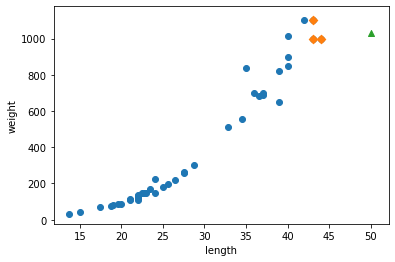

In [16]:
# 훈련 세트 산점도 그리기
plt.scatter(train_input, train_target)
# 훈련 세트 중 이웃 샘플 그리기
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
# 50cm 농어 데이터
plt.scatter(50, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [17]:
# 50cm 농어에서 가장 가까운건 40~45cm농어 3개의 평균 무게값을 구하기 때문
# 새로운 샘플이 훈련 샘플의 범위에서 벗어나면 엉뚱한 값을 예측할 수 있음
# 길이가 100cm 농어도 1033g으로 예측

In [18]:
# 이웃 샘플 타깃 평균
np.mean(train_target[indexes])

1033.3333333333333

In [19]:
# 농어길이 100cm 무게 예측
knr.predict([[100]])

array([1033.33333333])

In [20]:
# 100cm 농어 이웃 구하기
distances, indexes = knr.kneighbors([[100]])

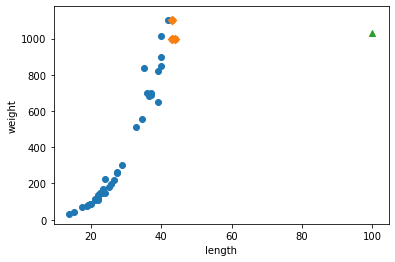

In [21]:
# 훈련 세트 산점도 그리기
plt.scatter(train_input, train_target)
# 훈련 세트 중 이웃 샘플 그리기
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
# 50cm 농어 데이터
plt.scatter(100, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [22]:
# 가장 큰 농어 포함되도록 훈련세트 다시 만들어야 함 but, 
# 더 큰 범위 농어가 들어올 때 또 수정해야하므로 다른 알고리즘으로 적용

## 선형회귀 ##

In [23]:
# 선형회귀 객체 생성
from sklearn.linear_model import LinearRegression
Ir = LinearRegression()

In [24]:
# 선형회귀 모델 훈련
Ir.fit(train_input, train_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
# 50cm 농어 무게 예측
Ir.predict([[50]])

array([1241.83860323])

In [28]:
# y = ax+b
# a기울기(계수 또는 가중치라고 함), b절편
Ir.coef_, Ir.intercept_

(array([39.01714496]), -709.0186449535477)

In [29]:
# 여기서 coef, intercept는 모델파라미터임(머신러닝 알고리즘이 찾은 값)
# 머신러닝 알고리즘 훈련과정은 최적의 모델 파라미터를 찾는 것, 즉 모델 기반 학습
# k최근접 이웃은 모델 파라미터가 없으며 훈련세트 저장하는 것이 훈련의 일부, 사례 기반 학습

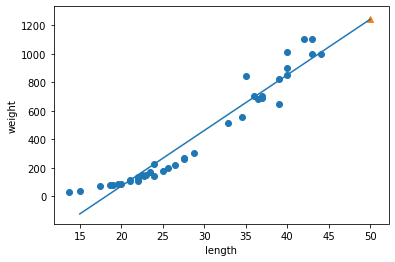

In [30]:
# 훈련 세트 산점도 그리기
plt.scatter(train_input, train_target)
# 농어 길이 15~50까지 1차 방정식 그래프 그리기
plt.plot([15, 50], [15*Ir.coef_+Ir.intercept_, 50*Ir.coef_+Ir.intercept_])
# 50cm농어 데이터
plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [32]:
# 훈련 세트, 테스트 세트 성능 평가
Ir.score(train_input, train_target)# 훈련세트

0.9398463339976039

In [33]:
Ir.score(test_input, test_target)# 테스트세트

0.8247503123313558

In [34]:
# 훈련세트 점수>테스트 세트 점수 
# 과대적합? 훈련세트 점수도 높지 않음, 과소적합임
# 직선에서 무게가 0 이하로 내려가는데 현실에선 있을 수 없음

## 다항 회귀 ##

In [35]:
# 산점도를 따라 약간의 곡선이 필요
# 2차 방정식 그래프필요
# 원 데이터 x값 제곱해서 붙이기
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))
# 브로드캐스팅 적용됨

In [36]:
# 열추가 하여 2차원 배열됨
train_poly.shape, test_poly.shape

((42, 2), (14, 2))

In [37]:
# 입력값은 그대로 사용했으나, 타깃값은 그대로 사용함(목표하는 값은 어떤 그래프를 훈련하든지 바꿀 필요x)
# 50cm 길이 농어 모델 예측 
# 훈련
Ir = LinearRegression()
Ir.fit(train_poly, train_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
# 예측
# 앞서 훈련했듯이 농어 길이 제곱, 원래 길이 함께 넣어주어야 함
Ir.predict([[50**2, 50]])

array([1573.98423528])

In [40]:
# 선형회귀보다 다항회귀가 더 높은 무게 예측함
Ir.coef_, Ir.intercept_

(array([  1.01433211, -21.55792498]), 116.05021078278304)

In [41]:
# 2차 다항식->선형 회귀임
# y(무게) = 1.01x길이(제곱)-21.6X길이 + 116.05

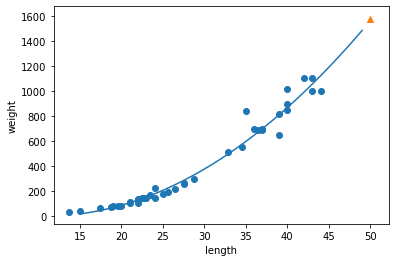

In [43]:
# 그래프 그리기
# 구간 별 15~49까지 정수 배열 만들기
point = np.arange(15, 50)

# 훈련 세트 산점도 그리기 
plt.scatter(train_input, train_target)

# 15에서 49까지 2차 방정식 그래프 그리기
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)

# 50cm 농어 데이터
plt.scatter(50, 1574, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
# 훈련세트 경향 잘 따름

In [44]:
# 모델 형가
Ir.score(train_poly, train_target)#훈련세트

0.9706807451768623

In [45]:
Ir.score(test_poly, test_target)#테스트세트

0.9775935108325122

In [ ]:
# 테스트 점수가 좀더 높은 것 같아 과소적합 문제가 약간 남아 있음